In [23]:
import pandas as pd
import numpy as np
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
pd.set_option('display.max_colwidth', None)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [24]:
df = pd.read_excel("C:/Users/User/Desktop/CSR/제조서비스팀_23년생산성지표.XLSX", sheet_name='23년_CSR_전체')
print(len(df))
df_real = df[['요청자 소속사','담당업무','제목','완료일','요청자명','접수자명(최초)','처리자명', '처리유형','처리방안','업무유형지수']]

4054


In [25]:
#티시스는 데이터 입력방식이 다르기 때문에 제거, 담당업무가 미지정,DMS인 경우 삭제 
df_real =df_real.loc[((df_real['요청자 소속사']!='TSIS') &(df_real['처리자명']!='이주용') )] # TSIS 약 126건 삭제 & 처리자가 이주용인경우 삭제
df_real['건수']=1 #건수 계산을 위한 컬럼 생성
print(len(df_real))
print(tabulate(df_real[['담당업무','처리유형','처리방안']].describe(),  headers='keys', tablefmt='psql', showindex=True))

3916
+--------+------------+------------+----------------------+
|        | 담당업무   | 처리유형   | 처리방안             |
|--------+------------+------------+----------------------|
| count  | 3916       | 3915       | 3906                 |
| unique | 25         | 3          | 11                   |
| top    | MM         | A 수동등록 | 업무 의뢰(확인/실행) |
| freq   | 692        | 2736       | 1957                 |
+--------+------------+------------+----------------------+


Text(5.5, 73.975, '평균점수 : 58.975,     표준편차 : 46.223')

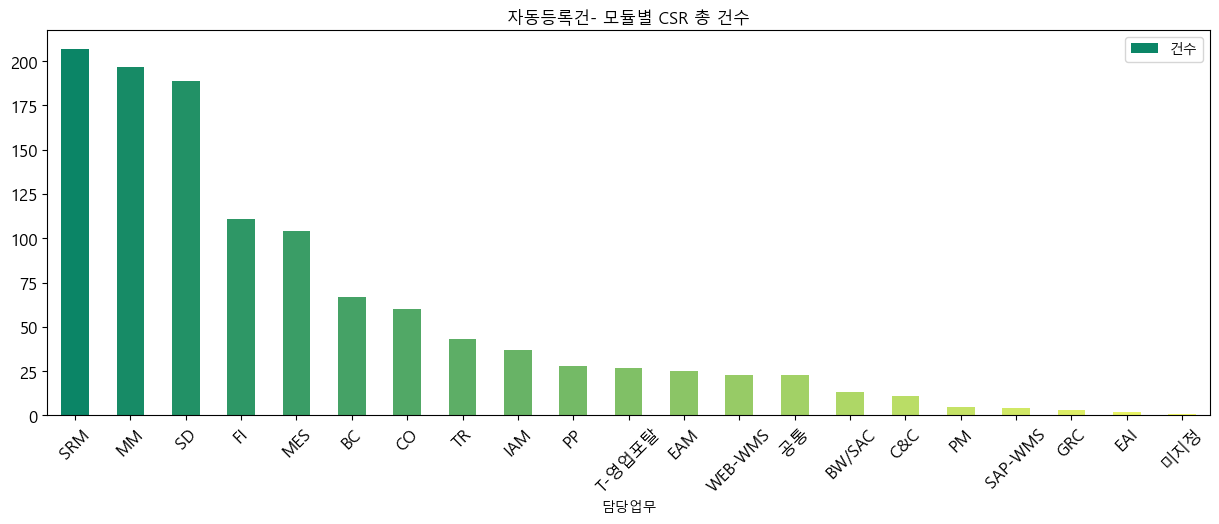

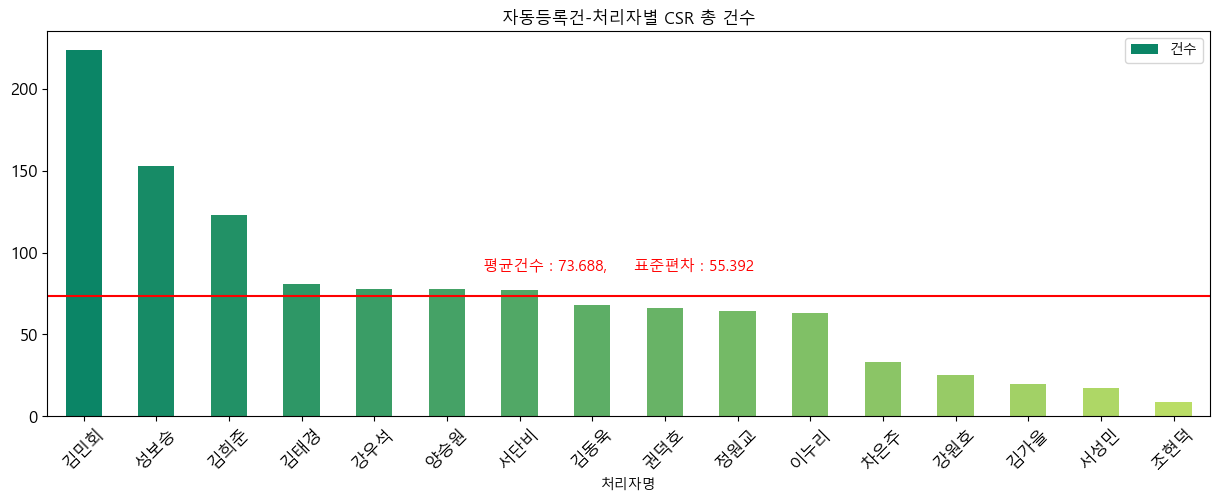

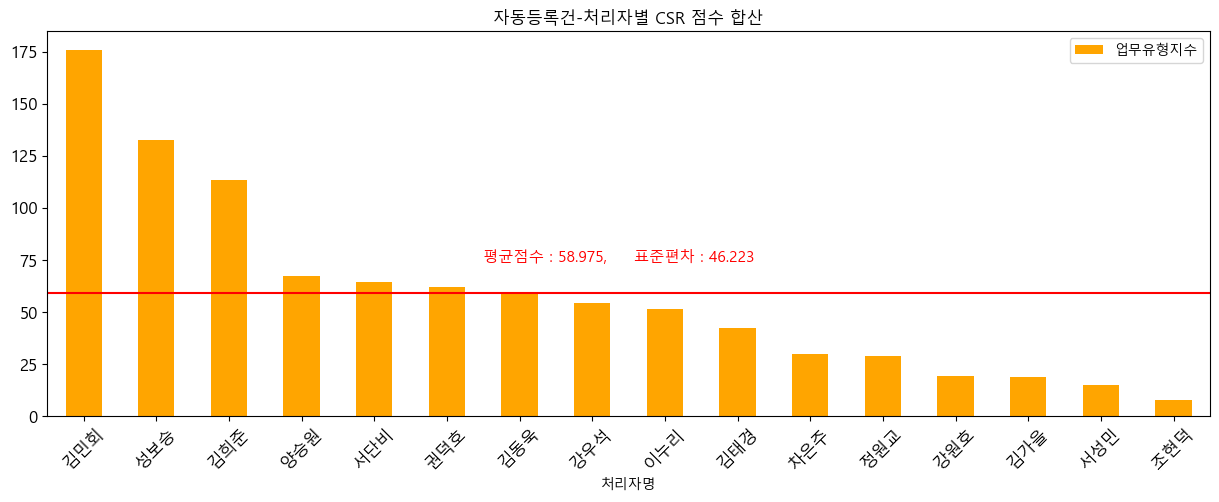

In [6]:
df_BC =df_real.loc[((df_real['처리유형']!='A 수동등록'))]
#자동등록건-모듈별 CSR 총 건수
csr_sub =df_BC.groupby(['담당업무'], sort=True)['건수'].sum().reset_index()
csr_sub =csr_sub.sort_values(by=['건수'],  ascending=False)
colors = sns.color_palette('summer', len(csr_sub)) # 바차트 색상
csr_sub.plot.bar(x='담당업무', y='건수', figsize=(15,5),fontsize=12,rot=45, title="자동등록건- 모듈별 CSR 총 건수", color=colors)


#자동등록건-처리자별 CSR 총 건수
csr_sub_group =df_BC.groupby(['처리자명'], sort=True)[['건수']].sum().reset_index()
csr_sub_group =csr_sub_group.sort_values(by=['건수'],  ascending=False)
csr_sub_group.plot.bar(x='처리자명', y='건수', figsize=(15,5),fontsize=12,rot=45, title="자동등록건-처리자별 CSR 총 건수",color=colors)
plt.axhline(y=csr_sub_group['건수'].mean(),color='red')
plt.text(5.5,csr_sub_group['건수'].mean()+15,'평균건수 : {},     표준편차 : {}'.format(round(csr_sub_group['건수'].mean(),3),round(csr_sub_group['건수'].std(),3)),fontsize=11, color ='red')


#자동등록건-처리자별 CSR 점수 합산
csr_sub_group =df_BC.groupby(['처리자명'], sort=True)[['업무유형지수']].sum().reset_index()
csr_sub_group =csr_sub_group.sort_values(by=['업무유형지수'],  ascending=False)
csr_sub_group.plot.bar(x='처리자명', y='업무유형지수', figsize=(15,5),fontsize=12,rot=45, title="자동등록건-처리자별 CSR 점수 합산", color='orange')
plt.axhline(y=csr_sub_group['업무유형지수'].mean(),color='red')
plt.text(5.5,csr_sub_group['업무유형지수'].mean()+15,'평균점수 : {},     표준편차 : {}'.format(round(csr_sub_group['업무유형지수'].mean(),3),round(csr_sub_group['업무유형지수'].std(),3)),fontsize=11, color ='red')


In [10]:
#각 모듈별 처리자별 건수 차이
data =df_real.groupby(['담당업무','처리자명'], sort=True)['건수'].sum().reset_index()
data_pivot = pd.DataFrame(data.pivot(index='담당업무',columns='처리자명', values='건수'))
data_pivot.fillna(0).astype('int').style.highlight_between(left=4, right=1000, axis=1, props='color:white; background-color:slateblue;')

처리자명,강우석,강원호,권덕호,김가을,김동욱,김민회,김태경,김희준,서단비,서성민,성보승,양승원,이누리,정원교,조현덕,차은주
담당업무,,,,,,,,,,,,,,,,
BC,0,0,0,0,0,0,268,0,0,0,1,0,0,0,0,0
BW/SAC,0,0,0,0,0,0,47,0,0,0,0,0,0,0,0,0
C&C,0,0,0,0,0,13,0,0,0,1,0,0,0,0,0,0
CO,0,0,0,80,107,0,0,0,0,0,0,0,0,0,0,0
DMS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EAI,0,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0
EAM,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,1
FI,0,0,0,0,0,0,0,0,200,0,1,97,0,0,0,0
GRC,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0


Text(5.5, 89.00666666666667, '평균점수 : 74.007,     표준편차 : 77.97')

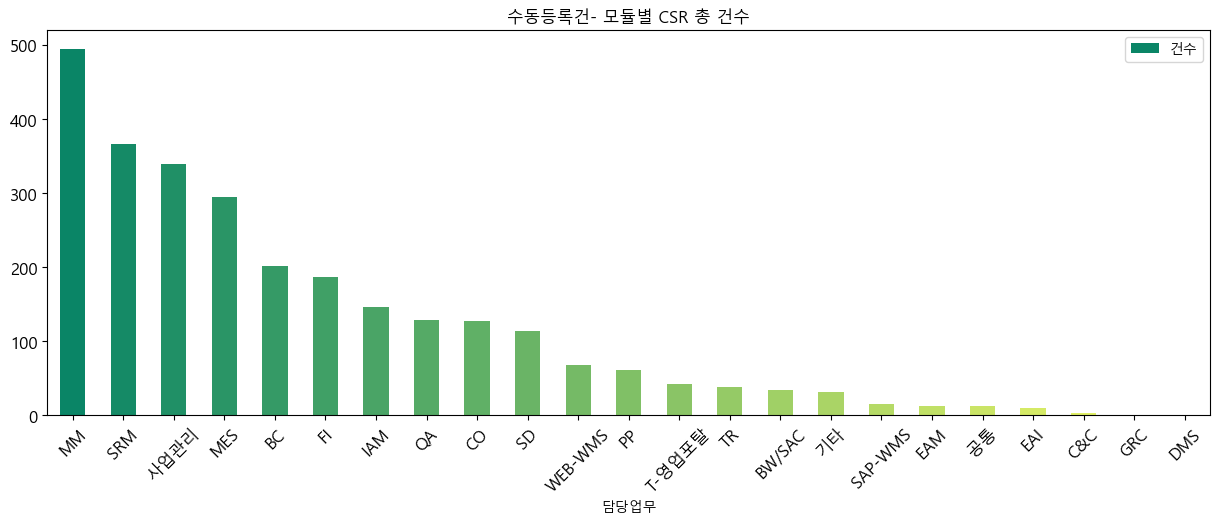

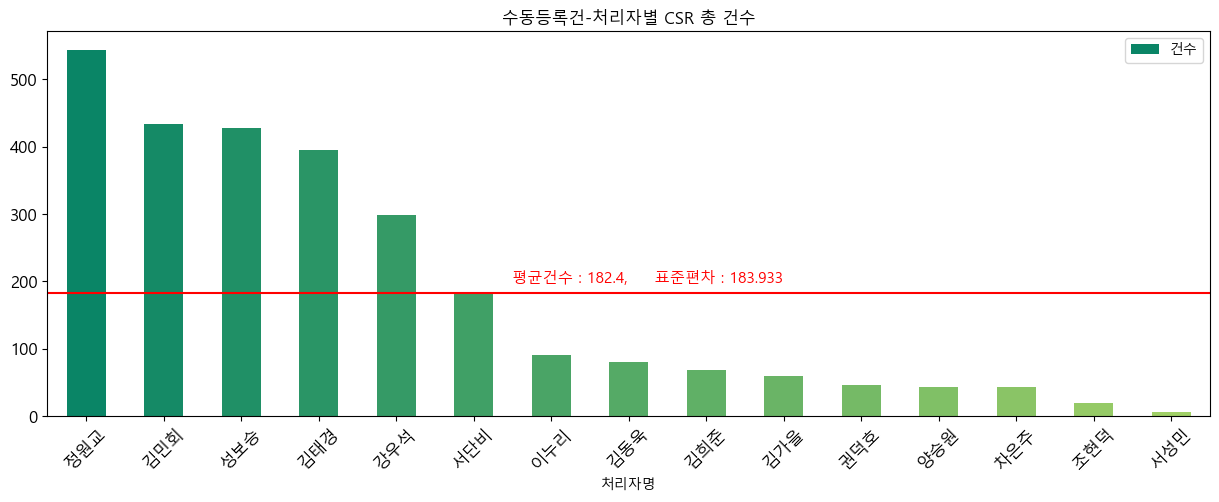

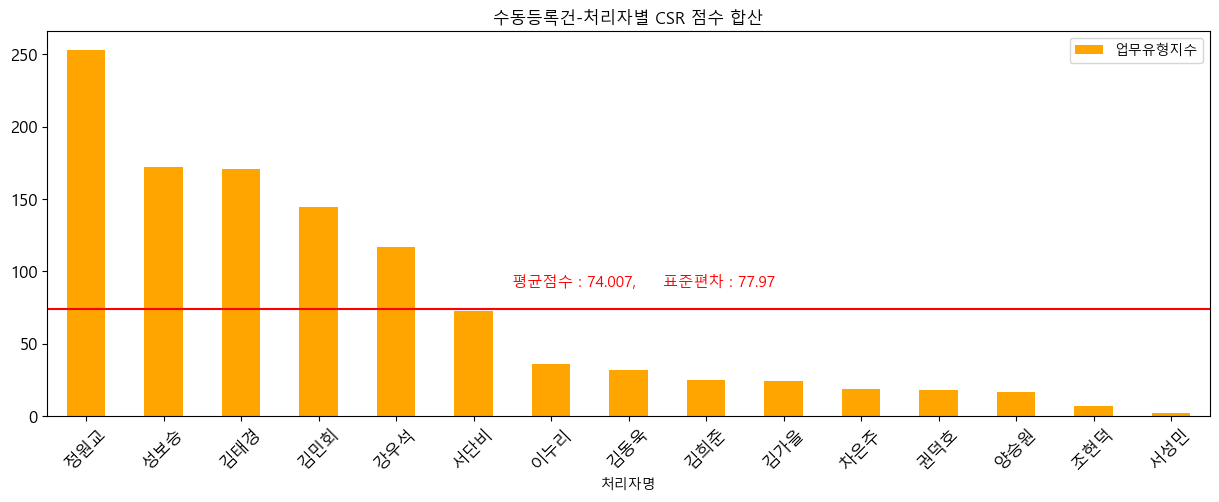

In [12]:
df_A =df_real.loc[((df_real['처리유형']=='A 수동등록'))]
#수동등록건-모듈별 CSR 총 건수
csr_sub =df_A.groupby(['담당업무'], sort=True)['건수'].sum().reset_index()
csr_sub =csr_sub.sort_values(by=['건수'],  ascending=False)
colors = sns.color_palette('summer', len(csr_sub)) # 바차트 색상
csr_sub.plot.bar(x='담당업무', y='건수', figsize=(15,5),fontsize=12,rot=45, title="수동등록건- 모듈별 CSR 총 건수", color=colors)


#수동등록건-처리자별 CSR 총 건수
csr_sub_group =df_A.groupby(['처리자명'], sort=True)[['건수']].sum().reset_index()
csr_sub_group =csr_sub_group.sort_values(by=['건수'],  ascending=False)
csr_sub_group.plot.bar(x='처리자명', y='건수', figsize=(15,5),fontsize=12,rot=45, title="수동등록건-처리자별 CSR 총 건수",color=colors)
plt.axhline(y=csr_sub_group['건수'].mean(),color='red')
plt.text(5.5,csr_sub_group['건수'].mean()+15,'평균건수 : {},     표준편차 : {}'.format(round(csr_sub_group['건수'].mean(),3),round(csr_sub_group['건수'].std(),3)),fontsize=11, color ='red')


#수동등록건-처리자별 CSR 점수 합산
csr_sub_group =df_A.groupby(['처리자명'], sort=True)[['업무유형지수']].sum().reset_index()
csr_sub_group =csr_sub_group.sort_values(by=['업무유형지수'],  ascending=False)
csr_sub_group.plot.bar(x='처리자명', y='업무유형지수', figsize=(15,5),fontsize=12,rot=45, title="수동등록건-처리자별 CSR 점수 합산", color='orange')
plt.axhline(y=csr_sub_group['업무유형지수'].mean(),color='red')
plt.text(5.5,csr_sub_group['업무유형지수'].mean()+15,'평균점수 : {},     표준편차 : {}'.format(round(csr_sub_group['업무유형지수'].mean(),3),round(csr_sub_group['업무유형지수'].std(),3)),fontsize=11, color ='red')


<Axes: title={'center': '처리자별 CSR 처리유형 총 점수'}, xlabel='처리자명'>

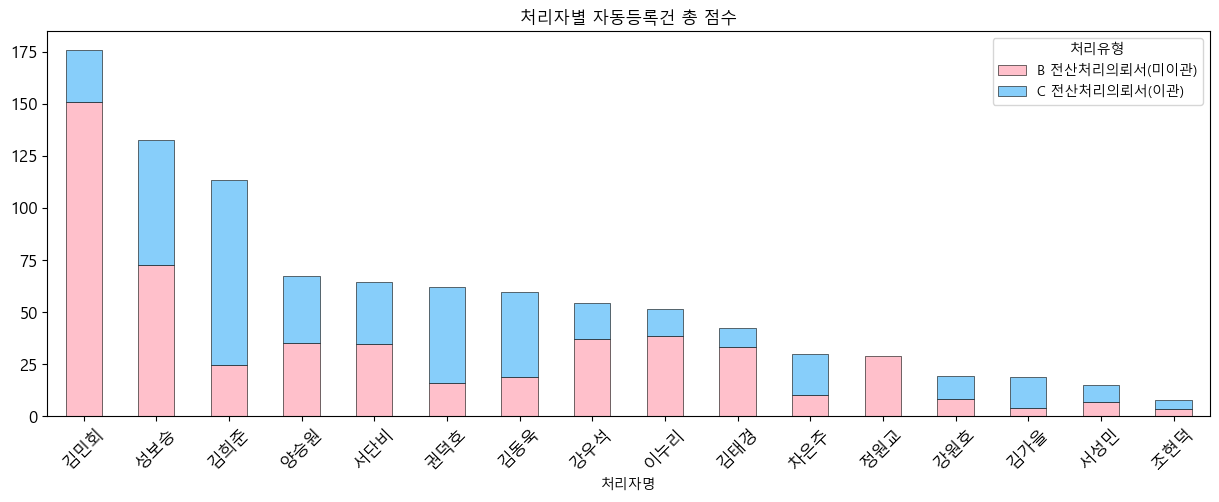

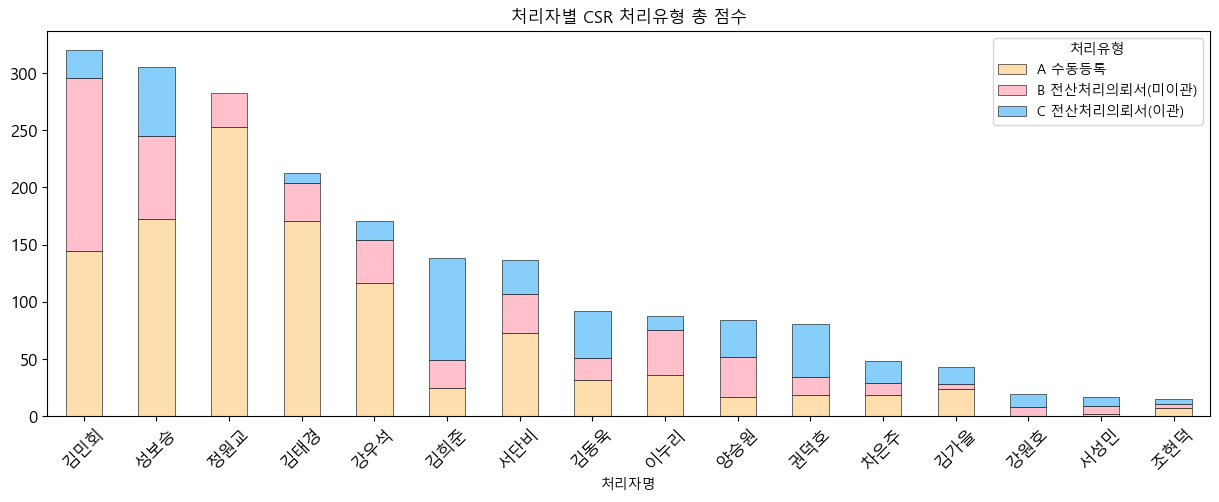

In [22]:
data =df_real.groupby(['처리자명','처리유형'], sort=True)['업무유형지수'].sum().reset_index()
data_pivot = data.pivot(index='처리자명',columns='처리유형', values='업무유형지수')
data_pivot = data_pivot.iloc[0:,1:3]
data_pivot['total'] = data_pivot.sum(axis=1)
data_pivot.sort_values('total', inplace=True, ascending=False)
data_pivot.iloc[0:,0:2].plot(kind='bar', title="처리자별 자동등록건 총 점수", figsize=(15,5),fontsize=12,rot=45,stacked=True,color=['pink','lightskyblue'],edgecolor='black',linewidth=0.4)

data =df_real.groupby(['처리자명','처리유형'], sort=True)['업무유형지수'].sum().reset_index()
data_pivot = data.pivot(index='처리자명',columns='처리유형', values='업무유형지수')
data_pivot['total'] = data_pivot.sum(axis=1)
data_pivot.sort_values('total', inplace=True, ascending=False)
data_pivot.iloc[0:,0:3].plot(kind='bar', title="처리자별 CSR 처리유형 총 점수", figsize=(15,5),fontsize=12,rot=45,stacked=True,color=['navajowhite','pink','lightskyblue'],edgecolor='black',linewidth=0.4)
